In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

/bin/bash: google-drive-ocamlfuse: command not found


In [0]:
!pip install keras

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 22.3MB/s 


In [0]:
train_dir = '/content/drive/Data/Train'
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                rescale=1./255,
                width_shift_range=0.09,
                height_shift_range=0.18,
                shear_range=0.15,
                zoom_range=0.1,
                horizontal_flip=True,
                fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(256, 256),
                batch_size=128,
                class_mode='categorical')

Found 173 images belonging to 4 classes.


In [0]:
from keras import layers
from keras import models
from keras import applications
model = models.Sequential()
conv_base = applications.VGG16(weights='imagenet', 
                               include_top=False, 
                               input_shape=[256, 256, 3]) 
conv_base.trainable = False
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

from keras import optimizers
model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(lr=2e-5),
                metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              33555456  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 2052      
Total para

In [0]:
from keras import callbacks
mc = callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                     save_weights_only=True, period=10)
history = model.fit_generator(
                train_generator,
                steps_per_epoch=50,
                epochs=50,
                callbacks=[mc]
                )

Epoch 1/50
50/50 [==============================] - 77s 2s/step - loss: 1.1219 - acc: 0.5294
Epoch 2/50
50/50 [==============================] - 71s 1s/step - loss: 0.8057 - acc: 0.6725
Epoch 3/50
50/50 [==============================] - 72s 1s/step - loss: 0.6499 - acc: 0.7389
Epoch 4/50
50/50 [==============================] - 71s 1s/step - loss: 0.5505 - acc: 0.7842
Epoch 5/50
50/50 [==============================] - 70s 1s/step - loss: 0.4688 - acc: 0.8203
Epoch 6/50
50/50 [==============================] - 70s 1s/step - loss: 0.4269 - acc: 0.8406
Epoch 7/50
50/50 [==============================] - 72s 1s/step - loss: 0.3492 - acc: 0.8708
Epoch 8/50
50/50 [==============================] - 70s 1s/step - loss: 0.3381 - acc: 0.8739
Epoch 9/50
50/50 [==============================] - 71s 1s/step - loss: 0.3022 - acc: 0.8903
Epoch 10/50
50/50 [==============================] - 71s 1s/step - loss: 0.2725 - acc: 0.8980
Epoch 11/50
50/50 [==============================] - 72s 1s/step - lo

dict_keys(['loss', 'acc'])


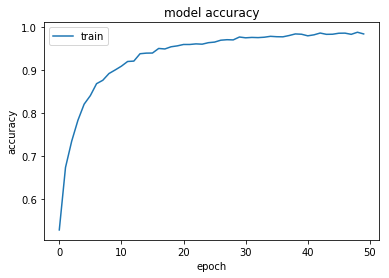

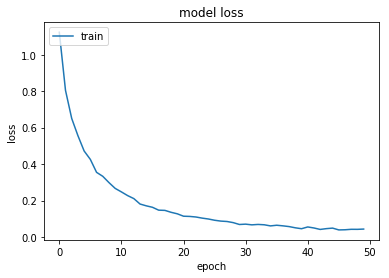

In [0]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()